# Data preprocessing and artifact removal

Nous nous sommes basé sur [Ce tutorial](https://mne.tools/stable/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html#sphx-glr-auto-tutorials-preprocessing-plot-40-artifact-correction-ica-py). Les composantes indépendantes utilisées ici sont  celles calculées dans le [repo](https://github.com/sstober/openmiir/tree/master/eeg/preprocessing) du dataset. 



The data :
-  5 blocks that each comprised all 12 stimuli in randomized order: 60 perception trials per subject.
- EEG was recorded with a BioSemi Active-Two system using 64+2 EEG channels at 512 Hz. 
- Hor- izontal and vertical electrooculography (EOG) channels were used to record eye movements. 

To do :

- remove and interpolate bad EEG channels (between 0 and 3 per subject) identified by manual visual inspection.
- Filter with a bandpass keeping a frequency range between 0.5 and 30 Hz ( this also remove any slow signal drift in the EEG) 
- To remove artifacts caused by eye blinks, we computed ICA  and semi-automatically removed components that had a high correlation with the EOG channels.
- Reconstruct from the remaining independent components without reducing dimensionality. 
- all trial channels were additionally normalized to zero mean and range [−1, 1].

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mne.preprocessing import read_ica, ICA
import os

In [8]:
import matplotlib.pyplot as plt
import mne
from mne import read_proj
from mne.io import read_raw_fif
from mne.datasets import sample
import os
ROOT = os.path.split(ROOT)[0]

In [12]:
subject = "01"

'/home/brain'

In [34]:
ls /home/brain/openmiir/


audio/  eeg/  meta/  questionnaire/  rawsbeforehoes.zip  README.md


In [36]:
RAW_DIR = os.path.join(ROOT,"openmiir/raw_data/")
path = os.path.join(RAW_DIR,f"P{subject}-raw.fif")
raw = mne.io.read_raw_fif(path,preload=True)

Opening raw data file /home/brain/openmiir/raw_data/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


In [37]:
raw.info

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 STIM
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>

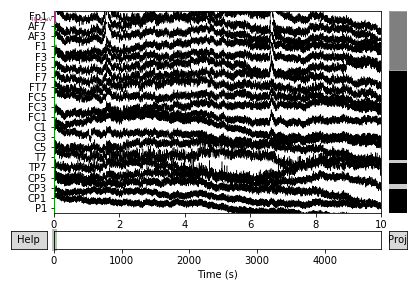

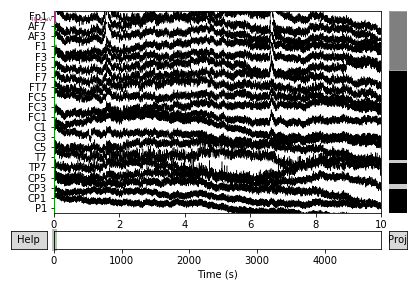

In [41]:
raw.plot()

In [18]:
ICA_DIR = os.path.join(ROOT,"openmiir/eeg/preprocessing/ica/")
ica = read_ica(os.path.join(ICA_DIR, f"P{subject}-100p_64c-ica.fif"))

Reading /home/brain/openmiir/eeg/preprocessing/ica/P01-100p_64c-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
Now restoring ICA solution ...
Ready.


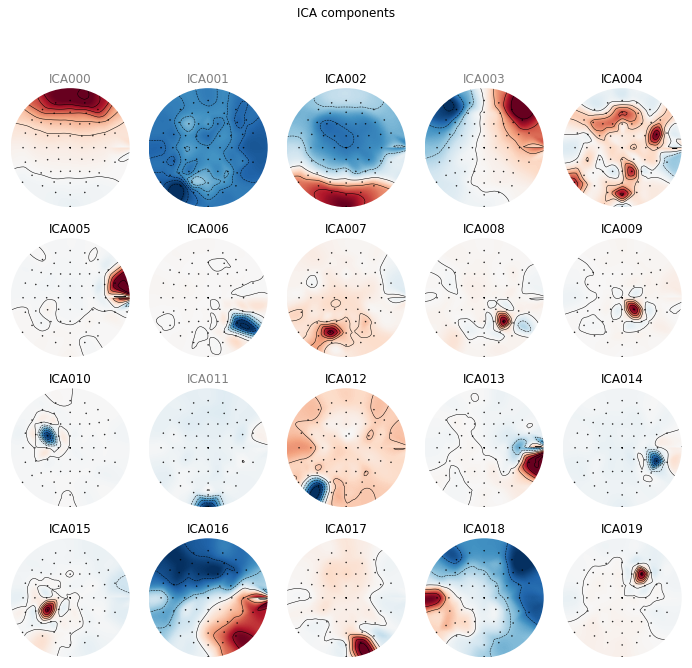

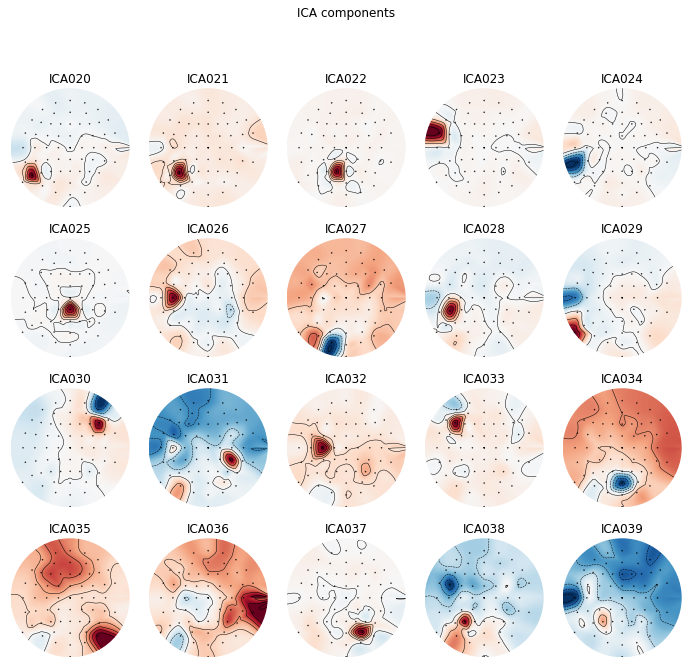

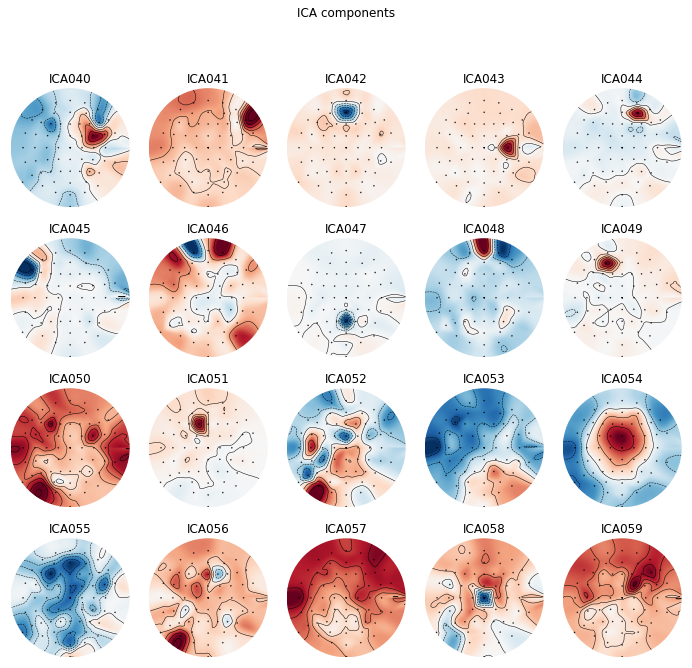

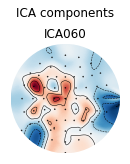

In [19]:
ica.plot_components()


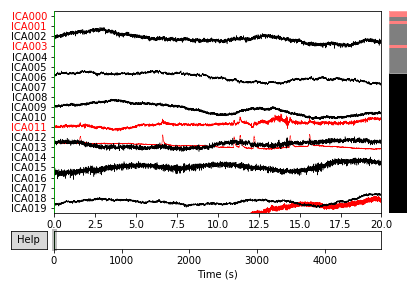

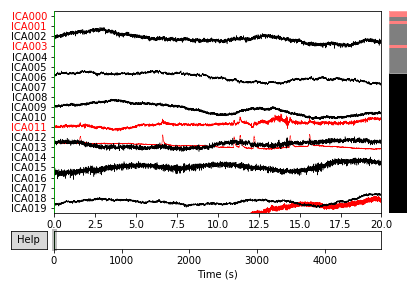

In [39]:
ica.plot_sources(raw)

In [40]:
reconst_raw = raw.copy()
s = ica.apply(reconst_raw)

Transforming to ICA space (61 components)
Zeroing out 4 ICA components


In [11]:
X = raw.get_data()
X_clean = s.get_data()

In [12]:
sfreq = raw.info['sfreq']

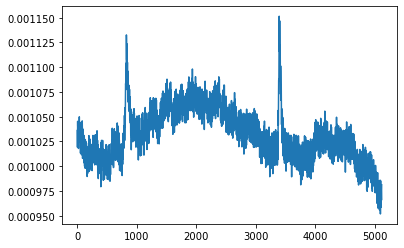

In [13]:
from pylab import *
plot(X[1, 0:int(10 * sfreq)])

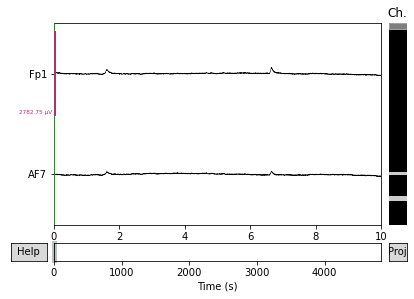

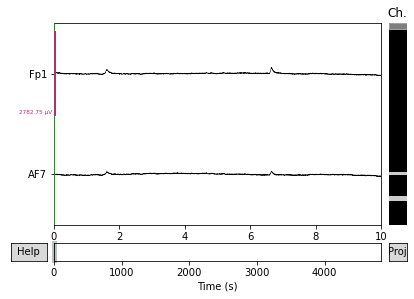

In [14]:
raw.plot(n_channels = 2, scalings = 'auto')

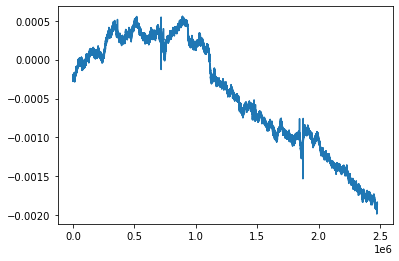

In [15]:
plot(X_clean[0])

Effective window size : 4.000 (s)


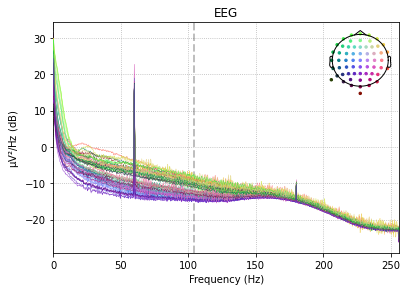

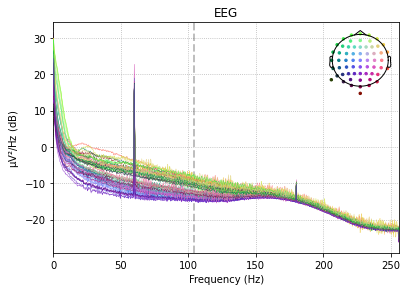

In [16]:
raw.plot_psd()

Effective window size : 4.000 (s)


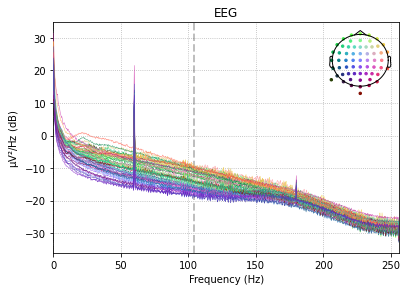

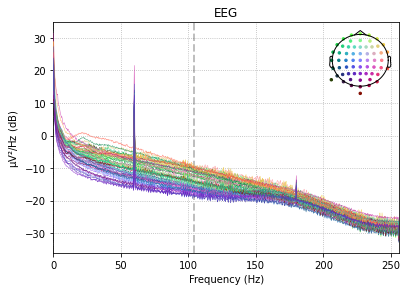

In [17]:
reconst_raw.plot_psd()

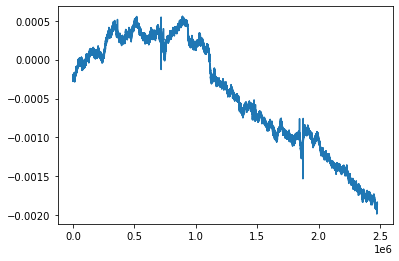

In [18]:
plot(X_clean[0])

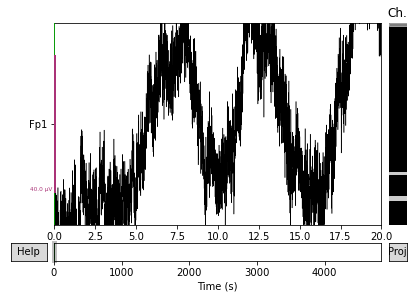

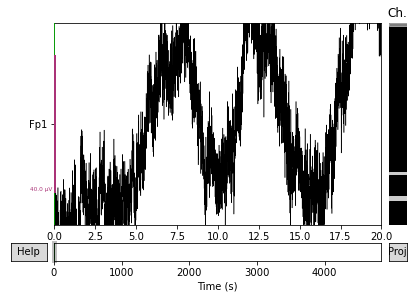

In [19]:
reconst_raw.plot(duration=20.0, start=0.0, n_channels=1)

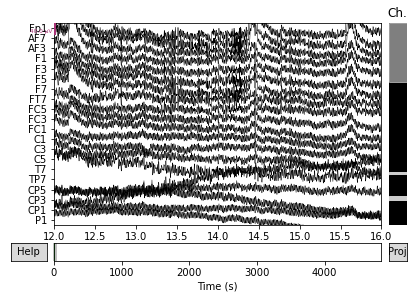

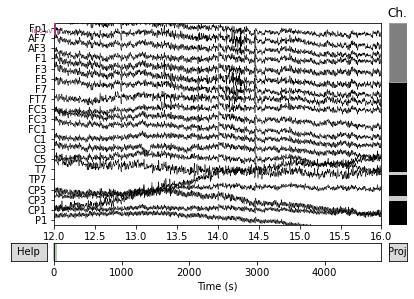

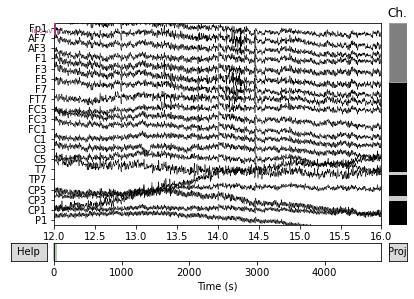

In [20]:
# show some frontal channels to clearly illustrate the artifact removal
chs = raw.ch_names
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(order=chan_idxs, start=12, duration=4)
reconst_raw.plot(order=chan_idxs, start=12, duration=4)